# Groove based workpiece data and geometry

## Overview

**This tutorial covers:**

Working with workpiece related data that can be described by a 2 dimensional groove and a seam length 

**Requirements:**

Opening and navigating through WelDX files
>TODO: link tutorial, once it is merged

## Plotting the specimen's groove

An important piece that will be part of most WelDX files is the specimen data.
The complexity of a specimen can range from a single metal plate to complex 3 dimensional multi-part structures.
In this tutorial, we will discuss specimen geometries based on a 2-dimensional cross-section that is extruded into 3d space.

First we open the example file and extract the workpiece informatation.

> TODO: Review this hint before merging

> HINT: Remember that you can get a quick overview over a WelDX file with the `WeldxFile.info()` method

In [9]:
from weldx import WeldxFile

wxfile = WeldxFile("single_pass_weld.wx")
workpiece = wxfile["workpiece"]

The workpiece data of this particular file consists of two parts:

In [10]:
for key in workpiece.keys():
    print(key)

base_metal
geometry


The `base_metal` field contains information about the composition of the specimens material, which is not relevant for this tutorial.
We are only interested in the `geometry` section that is further divided into `groove_shape` and `seam_length`:

In [16]:
for key in workpiece["geometry"].keys():
    print(key)

groove_shape
seam_length


`groove_shape` describes the 2 dimensional cross-section of the specimen.
If we extract it, we will see that the returned object is of a special type defined by weldx:

In [17]:
groove = workpiece["geometry"]["groove_shape"]
type(groove)

weldx.welding.groove.iso_9692_1.VGroove

One can already deduce from the types name that the specimens cross section is a V-groove defined by ISO 9692-1.
The norm describes the shape of the groove by different shape parameters.
We could now inspect the different parameter values and look up what meaning they have.
However, this would be rather tedious.
A much simpler way is to use the `plot` method of the groove object:

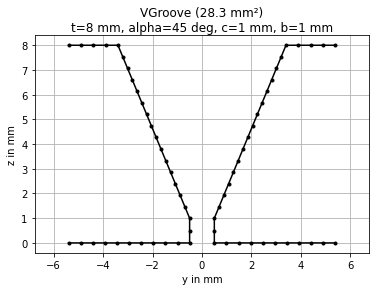

In [18]:
groove.plot()

Apart from the visual representation, the plot also contains all relevant information like the groove's area and the ISO 9692-1 parameters.

## Other cross-sections

Not all specimens might have a cross section that is described by a norm or the norm it uses might simply be not considered in the WelDX API.
For such cases, WelDX provides a more generalized class called `Profile`.
It allows us to define arbitrary cross-sections based on simple geometric elements such as lines and arcs.
So be aware, that you might get a `Profile` instead of any of the available groove types out of a WelDX file.
In fact, all groove types are based on the `Profile` class and we can convert them with the `to_profile` method:

In [23]:
profile = groove.to_profile()
type(profile)

weldx.geometry.Profile

We can plot the content of a `Profile` the same way as we did before with the groove:

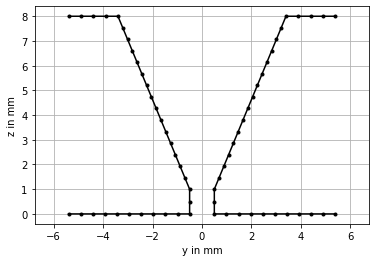

In [24]:
profile.plot()

The only difference here is that we don't get the additional, norm-related information.

## 3-dimensional plot

We can also create a nice 3d plot from the groove and the seam length stored in the WelDX file.
All we need fore this is the `Geometry` class of WelDX.
It can be created from a groove or profile and a length:

In [37]:
from weldx import Geometry, Trace, LinearHorizontalTraceSegment, Q_

t = Trace(LinearHorizontalTraceSegment(workpiece["geometry"]["seam_length"]))
geometry = Geometry(groove.to_profile(), t)

Now all that remains, you might have guessed it, is to call the plot method:

<Axes3DSubplot:>

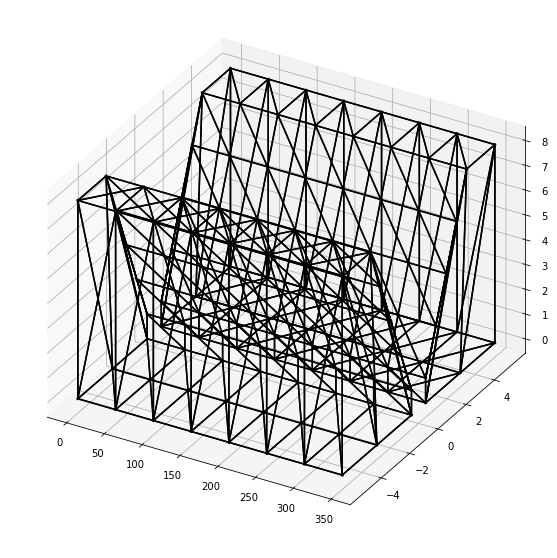

In [38]:
geometry.plot(Q_("2mm"), Q_("50mm"))

By default, the plot function will use Matplotlib for rendering.
However, Matplotlib wasn't originally designed for 3d plots.
Therefore, the quality of the rendered image might not be sufficient.
As an alternative, you can enable k3d as rendering backend when working in a jupyter notebook.

> TODO: continue after geometry enhancements

## Export 3d geometry into a CAD file

The `Geometry` class features a `to_file` method, that allows you to export the 3d data to different file formats like `.ply` or `.stl`.
Using this function, you can inspect the geometry in a CAD program or model viewer of your choice:

In [45]:
geometry.to_file("weldx_geometry.stl", profile_raster_width=Q_("2mm"), trace_raster_width=Q_("50mm"))

The parameters `profile_raster_width` and `trace_raster_width` determine the density of the data points of the exported mesh.
All the previously discussed `.plot` methods have similar optional parameters.

## Conclusion

In this tutorial we have leared that WelDX can store geometrical data in form of a 2d-cross section and an extrusion length.
The 2d cross section can either be of a specialized groove type or a more general `Profile`.
Both can be visualized using the `plot` function and turned into an actual 3d geometry using the `Geometry` class.
The `Geometry` class itself can also be rendered in a 3d plot and exported to a CAD compatible file format.